In [ ]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
df = web.DataReader("PETR4.SA", data_source="yahoo", start="2015-01-01", end="2019-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.990000,9.350000,9.990000,9.36,49559500.0,8.400567
2015-01-05,9.190000,8.530000,9.140000,8.56,78385100.0,7.682570
2015-01-06,8.830000,8.040000,8.710000,8.28,84723300.0,7.431271
2015-01-07,8.730000,8.360000,8.560000,8.67,85531000.0,7.781296
2015-01-08,9.390000,8.740000,8.790000,9.23,83306300.0,8.283895
...,...,...,...,...,...,...
2019-12-20,30.600000,30.020000,30.600000,30.26,93064900.0,28.872976
2019-12-23,30.500000,30.030001,30.190001,30.50,21970200.0,29.101973
2019-12-26,30.930000,30.500000,30.590000,30.91,24810500.0,29.493183


In [ ]:
df.shape

(1241, 6)

In [ ]:
df_bovespa = web.DataReader("^BVSP", data_source="yahoo", start="2015-01-01", end="2019-12-31")
# df_bovespa.reset_index(inplace=True,drop=False)
df_bovespa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50005.0,48345.0,50005.0,48512.0,2882100.0,48512.0
2015-01-05,48512.0,47264.0,48512.0,47517.0,3866100.0,47517.0
2015-01-06,48061.0,47338.0,47517.0,48001.0,4559300.0,48001.0
2015-01-07,49882.0,48006.0,48006.0,49463.0,4408800.0,49463.0
2015-01-08,50261.0,49017.0,49463.0,49943.0,3621900.0,49943.0
...,...,...,...,...,...,...
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0


In [ ]:
df_bovespa.shape

(1235, 6)

In [ ]:
df = df.merge(df_bovespa, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df.describe()

,High,Low,Open,Close,Volume,Adj Close,High_bovespa,Low_bovespa,Open_bovespa,Close_bovespa,Volume_bovespa,Adj Close_bovespa
count,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,16.946024,16.417725,16.693765,16.669887,5.410856e+07,15.220395,71258.726316,69996.229960,70605.106883,70656.285020,3.794215e+06,70656.285020
std,7.135614,7.025846,7.087856,7.081970,2.619016e+07,6.751512,19634.810008,19447.130086,19532.433000,19564.626768,1.203582e+06,19564.626768
min,4.270000,4.120000,4.200000,4.200000,0.000000e+00,3.769486,38031.000000,37046.000000,37501.000000,37497.000000,0.000000e+00,37497.000000
25%,11.150000,10.630000,10.910000,10.855000,3.727595e+07,9.742326,53498.500000,52677.000000,53087.500000,53094.500000,3.078600e+06,53094.500000
50%,15.520000,15.060000,15.300000,15.310000,4.868110e+07,13.740672,66758.000000,65842.000000,66195.000000,66235.000000,3.658900e+06,66235.000000
75%,23.160000,22.575000,22.810000,22.890000,6.523980e+07,20.657988,86157.000000,84582.500000,85515.000000,85539.000000,4.389100e+06,85539.000000
max,31.230000,30.500000,30.889999,30.969999,2.403438e+08,29.550430,117803.000000,115995.000000,117205.000000,117203.000000,1.104670e+07,117203.000000


In [ ]:
df['MA3'] = df['Close'].rolling(window=3, min_periods=0).mean()
df['MA7'] = df['Close'].rolling(window=7, min_periods=0).mean()
df['MA20'] = df['Close'].rolling(window=20, min_periods=0).mean()
df['MA30'] = df['Close'].rolling(window=30, min_periods=0).mean()
df['MA60'] = df['Close'].rolling(window=60, min_periods=0).mean()

cma3 = df['Close'].expanding(min_periods=3).mean()
df['CMA3'] = cma3.fillna(df['MA3'])

df['ST3'] = df['Close'].rolling(window=3, min_periods=0).std(ddof=0)
df['ST7'] = df['Close'].rolling(window=7, min_periods=0).std(ddof=0)
df['ST20'] = df['Close'].rolling(window=20, min_periods=0).std(ddof=0)
df['ST30'] = df['Close'].rolling(window=30, min_periods=0).std(ddof=0)
df['ST60'] = df['Close'].rolling(window=60, min_periods=0).std(ddof=0)

df['UPPER3'] = df['MA3'] + (df['ST3'] * 2) 
df['LOWER3'] = df['MA3'] - (df['ST3'] * 2)

df['UPPER7'] = df['MA7'] + (df['ST7'] * 2)
df['LOWER7'] = df['MA7'] - (df['ST7'] * 2)

df['UPPER20'] = df['MA20'] + (df['ST20'] * 2)
df['LOWER20'] = df['MA20'] - (df['ST20'] * 2)

df['UPPER30'] = df['MA30'] + (df['ST30'] * 2)
df['LOWER30'] = df['MA30'] - (df['ST30'] * 2)

df['UPPER60'] = df['MA60'] + (df['ST60'] * 2)
df['LOWER60'] = df['MA60'] - (df['ST60'] * 2)

No handles with labels found to put in legend.


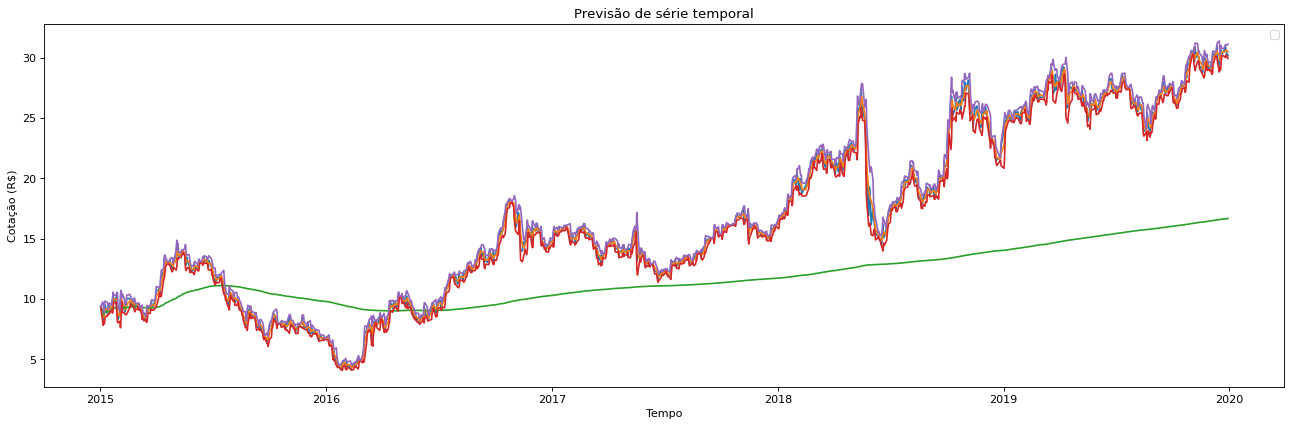

In [ ]:
data = df.filter(["Close", 'MA3', 'CMA3', 'LOWER3', 'UPPER3'])
figure(figsize=(20, 6), dpi=80)
plt.plot(df.index, data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


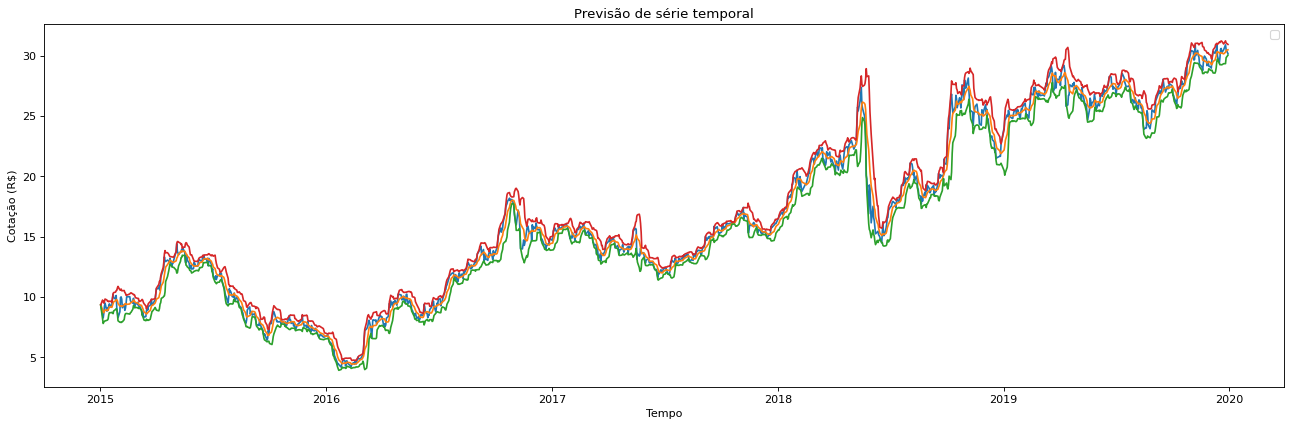

In [ ]:
data = df.filter(["Close", 'MA7', 'LOWER7', 'UPPER7'])
figure(figsize=(20, 6), dpi=80)
plt.plot(df.index, data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


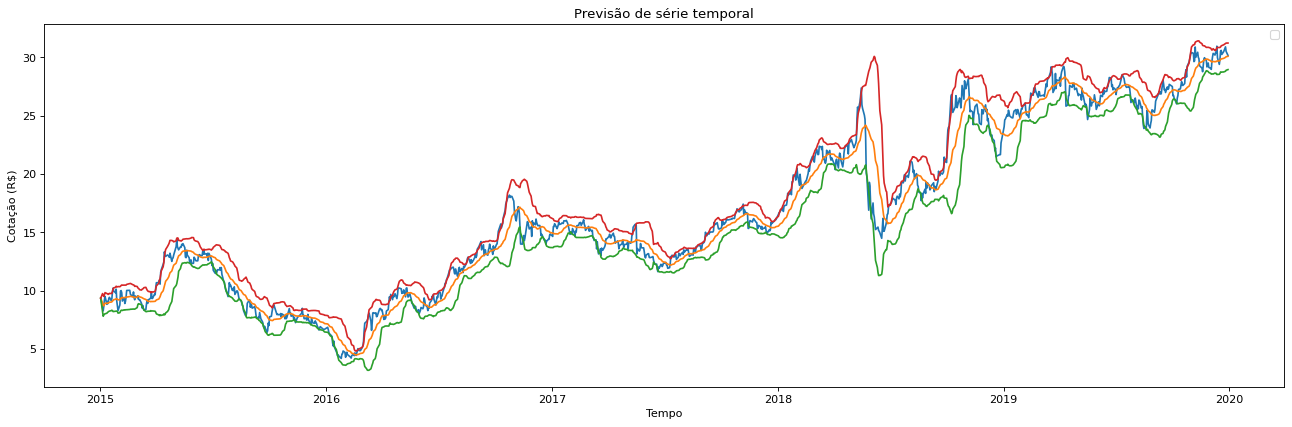

In [ ]:
data = df.filter(["Close", 'MA20', 'LOWER20', 'UPPER20'])
figure(figsize=(20, 6), dpi=80)
plt.plot(df.index, data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


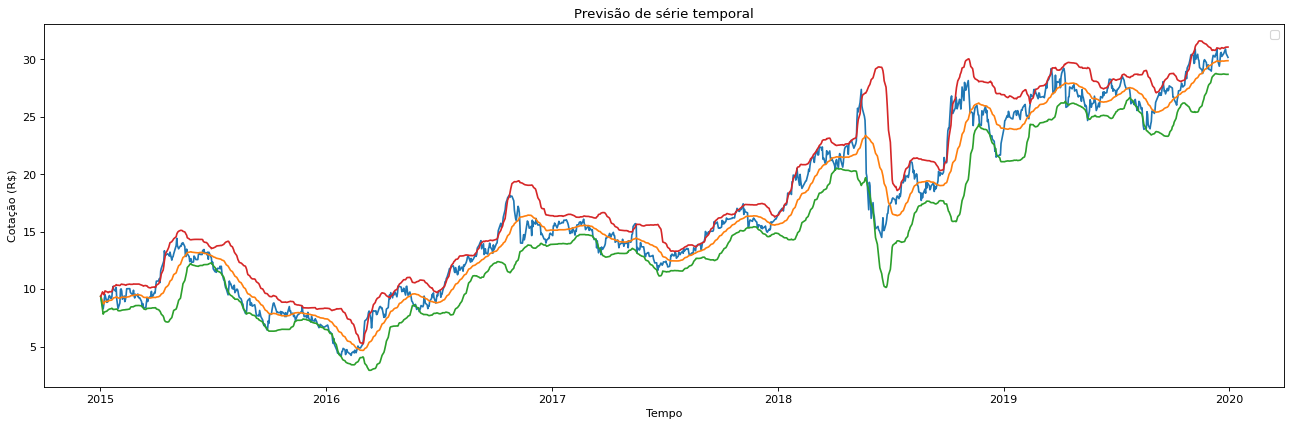

In [ ]:
data = df.filter(["Close", 'MA30', 'LOWER30', 'UPPER30'])
figure(figsize=(20, 6), dpi=80)
plt.plot(df.index, data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


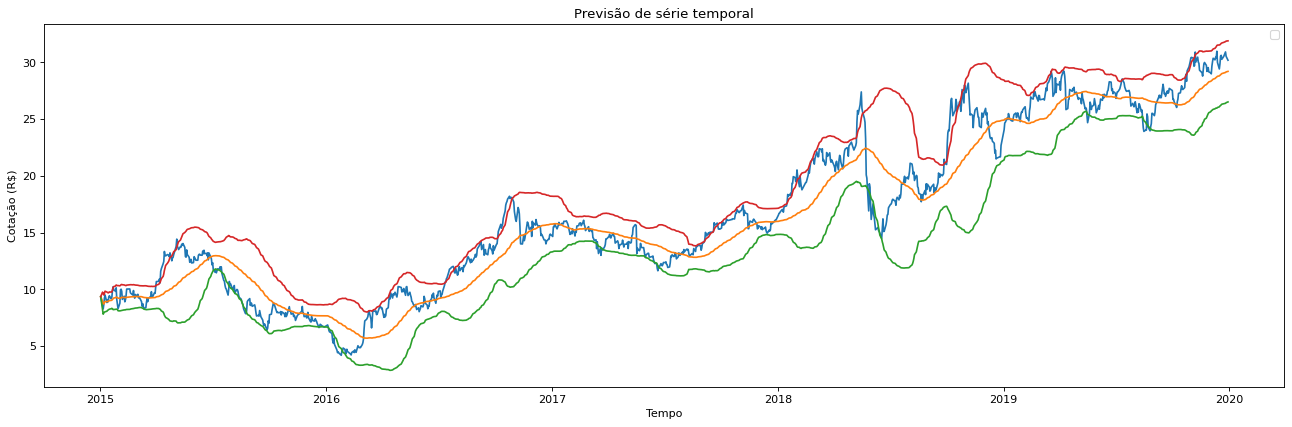

In [ ]:
data = df.filter(["Close", 'MA60', 'LOWER60', 'UPPER60'])
figure(figsize=(20, 6), dpi=80)
plt.plot(df.index, data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [ ]:
window_size = 3
N = len(df)
std_avg_predictions_3 = []
std_avg_predictions_7 = []
std_avg_predictions_20 = []
std_avg_predictions_30 = []
std_avg_predictions_60 = []

mse_errors_3 = []
mse_errors_7 = []
mse_errors_20 = []
mse_errors_30 = []
mse_errors_60 = []

dataNoIndex = df.reset_index()

for pred_idx in range(window_size,N):
    std_avg_predictions_3.append(np.mean(dataNoIndex[pred_idx-window_size:pred_idx]['Close']))
    mse_errors_3.append((std_avg_predictions_3[-1] - dataNoIndex[pred_idx:pred_idx + 1]['Close'])**2)

print('MSE error for standard averaging (window 3): %.5f'%(0.5*np.mean(mse_errors_3)))

window_size = 7
for pred_idx in range(window_size,N):
    std_avg_predictions_7.append(np.mean(dataNoIndex[pred_idx-window_size:pred_idx]['Close']))
    mse_errors_7.append((std_avg_predictions_7[-1] - dataNoIndex[pred_idx:pred_idx + 1]['Close'])**2)

print('MSE error for standard averaging (window 7): %.5f'%(0.5*np.mean(mse_errors_7)))

window_size = 20
for pred_idx in range(window_size,N):
    std_avg_predictions_20.append(np.mean(dataNoIndex[pred_idx-window_size:pred_idx]['Close']))
    mse_errors_20.append((std_avg_predictions_20[-1] - dataNoIndex[pred_idx:pred_idx + 1]['Close'])**2)

print('MSE error for standard averaging (window 20): %.5f'%(0.5*np.mean(mse_errors_20)))

window_size = 30
for pred_idx in range(window_size,N):
    std_avg_predictions_30.append(np.mean(dataNoIndex[pred_idx-window_size:pred_idx]['Close']))
    mse_errors_30.append((std_avg_predictions_30[-1] - dataNoIndex[pred_idx:pred_idx + 1]['Close'])**2)

print('MSE error for standard averaging (window 30): %.5f'%(0.5*np.mean(mse_errors_30)))

window_size = 60
for pred_idx in range(window_size,N):
    std_avg_predictions_60.append(np.mean(dataNoIndex[pred_idx-window_size:pred_idx]['Close']))
    mse_errors_60.append((std_avg_predictions_60[-1] - dataNoIndex[pred_idx:pred_idx + 1]['Close'])**2)

print('MSE error for standard averaging (window 60): %.5f'%(0.5*np.mean(mse_errors_60)))

MSE error for standard averaging (window 3): 0.16270
MSE error for standard averaging (window 7): 0.31333
MSE error for standard averaging (window 20): 0.86194
MSE error for standard averaging (window 30): 1.24861
MSE error for standard averaging (window 60): 2.10950


In [ ]:
window_size = 60
N = len(dataNoIndex)

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):
    running_mean = running_mean * decay + (1.0-decay) * dataNoIndex[pred_idx-1:pred_idx]['Close'].item()
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1] - dataNoIndex[pred_idx:pred_idx + 1]['Close'].item())**2)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.15118


In [ ]:
data = df.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa", 'MA3', 'MA7', 'MA20', 'MA30', 'MA60', 'CMA3', 'ST3', 'ST7', 'ST20', 'ST30', 'ST60', 'UPPER3', 'LOWER3', 'UPPER7', 'LOWER7', 'UPPER20', 'LOWER20', 'UPPER30', 'LOWER30', 'UPPER60', 'LOWER60'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .7)
training_data_len
dataset.shape
data

,Close,Volume,Close_bovespa,Volume_bovespa,MA3,MA7,MA20,MA30,MA60,CMA3,ST3,ST7,ST20,ST30,ST60,UPPER3,LOWER3,UPPER7,LOWER7,UPPER20,LOWER20,UPPER30,LOWER30,UPPER60,LOWER60
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,9.36,49559500.0,48512.0,2882100.0,9.360000,9.360000,9.360000,9.360000,9.360000,9.360000,0.000000,0.000000,0.000000,0.000000,0.000000,9.360000,9.360000,9.360000,9.360000,9.360000,9.360000,9.360000,9.360000,9.360000,9.360000
2015-01-05,8.56,78385100.0,47517.0,3866100.0,8.960000,8.960000,8.960000,8.960000,8.960000,8.960000,0.400000,0.400000,0.400000,0.400000,0.400000,9.759999,8.160001,9.759999,8.160001,9.759999,8.160001,9.759999,8.160001,9.759999,8.160001
2015-01-06,8.28,84723300.0,48001.0,4559300.0,8.733333,8.733333,8.733333,8.733333,8.733333,8.733333,0.457627,0.457627,0.457627,0.457627,0.457627,9.648586,7.818080,9.648586,7.818080,9.648586,7.818080,9.648586,7.818080,9.648586,7.818080
2015-01-07,8.67,85531000.0,49463.0,4408800.0,8.503333,8.717500,8.717500,8.717500,8.717500,8.717500,0.164182,0.397264,0.397264,0.397264,0.397264,8.831697,8.174970,9.512028,7.922972,9.512028,7.922972,9.512028,7.922972,9.512028,7.922972
2015-01-08,9.23,83306300.0,49943.0,3621900.0,8.726666,8.820000,8.820000,8.820000,8.820000,8.820000,0.389900,0.410219,0.410219,0.410219,0.410219,9.506467,7.946866,9.640438,7.999561,9.640438,7.999561,9.640438,7.999561,9.640438,7.999561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,30.26,93064900.0,115121.0,6887400.0,30.470001,30.231429,29.885500,29.866333,29.001500,16.624858,0.151218,0.488187,0.567710,0.578593,1.347479,30.772436,30.167566,31.207803,29.255055,31.020920,28.750080,31.023519,28.709147,31.696458,26.306542
2019-12-23,30.50,21970200.0,115863.0,3995200.0,30.456667,30.164286,29.924000,29.853000,29.048167,16.636120,0.146136,0.407672,0.581794,0.558893,1.350080,30.748938,30.164396,30.979629,29.348943,31.087588,28.760412,30.970785,28.735215,31.748326,26.348007
2019-12-26,30.91,24810500.0,117203.0,3788900.0,30.556667,30.297143,30.010000,29.882667,29.102333,16.647697,0.268369,0.472371,0.593936,0.589740,1.358469,31.093406,30.019928,31.241886,29.352400,31.197872,28.822128,31.062146,28.703187,31.819271,26.385395


In [ ]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

In [ ]:
scaled_data

array([[-1.03260081, -0.17376384, -1.1323117 , ..., -0.78888442,
        -1.30038435, -0.65643782],
       [-1.14560938,  0.92730898, -1.18318939, ..., -0.96891864,
        -1.24509529, -0.84289012],
       [-1.18516251,  1.1694139 , -1.15844085, ..., -1.02021656,
        -1.26049508, -0.89601676],
       ...,
       [ 2.01157041, -1.11911974,  2.38008994, ...,  2.11314822,
         1.8039986 ,  1.98891825],
       [ 1.95647877, -1.11206844,  2.34588172, ...,  2.11278602,
         1.80991191,  1.99765339],
       [ 1.90845006, -1.22221163,  2.3167357 , ...,  2.11301322,
         1.81306337,  2.00793938]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
# print(train_data)
window = 60
X_train = []
y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i,:])
    y_train.append(train_data[i, 0:1])
    # if i <= (window + 1):
    #   print(X_train)
    #   print(y_train)
    #   print()
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(805, 60, 25)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [ ]:
X_train.shape

(805, 60, 25)

In [ ]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# regressor.compile(loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 60, 100)           50400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 60, 80)            57920     
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                26200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [ ]:
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 1)

Epoch 1/50
13/13 [==============================] - 7s 139ms/step - loss: 0.2882
Epoch 2/50
13/13 [==============================] - 2s 138ms/step - loss: 0.0716
Epoch 3/50
13/13 [==============================] - 2s 136ms/step - loss: 0.0607
Epoch 4/50
13/13 [==============================] - 2s 139ms/step - loss: 0.0521
Epoch 5/50
13/13 [==============================] - 2s 139ms/step - loss: 0.0410
Epoch 6/50
13/13 [==============================] - 2s 140ms/step - loss: 0.0403
Epoch 7/50
13/13 [==============================] - 2s 138ms/step - loss: 0.0345
Epoch 8/50
13/13 [==============================] - 2s 136ms/step - loss: 0.0391
Epoch 9/50
13/13 [==============================] - 2s 137ms/step - loss: 0.0360
Epoch 10/50
13/13 [==============================] - 2s 139ms/step - loss: 0.0308
Epoch 11/50
13/13 [==============================] - 2s 137ms/step - loss: 0.0406
Epoch 12/50
13/13 [==============================] - 2s 138ms/step - loss: 0.0324
Epoch 13/50
13/13 [======

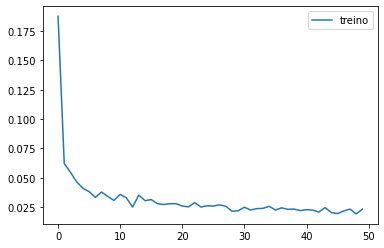

In [ ]:
plt.plot(history.history['loss'], label='treino')
plt.legend();

In [ ]:
test_data = scaled_data[training_data_len - window:, :]

X_test = []
y_test = dataset[training_data_len:, 0:1]

for i in range(window, len(test_data)): 
    X_test.append(test_data[i-window:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))
print(X_test.shape, X_train.shape)

(370, 60, 25) (805, 60, 25)


In [ ]:
predicted = regressor.predict(X_test)
volume = dataset[training_data_len:, 1:]
predicted = np.column_stack((predicted, volume))
# print(dataset[:,1:])
print(predicted.shape)
predicted = sc.inverse_transform(predicted)
print(predicted)

(370, 25)
[[1.64126487e+01 1.98271152e+15 1.42307513e+09 ... 8.94303467e+01
  2.19120658e+02 9.55982998e+01]
 [1.65834445e+01 1.42797977e+15 1.42458099e+09 ... 9.27270712e+01
  2.18884885e+02 9.50185649e+01]
 [1.67600161e+01 1.50419108e+15 1.44077395e+09 ... 9.64665892e+01
  2.18607462e+02 9.44544283e+01]
 ...
 [2.93383254e+01 6.49527987e+14 2.29217507e+09 ... 2.05936243e+02
  2.48970688e+02 1.83400054e+02]
 [2.92429358e+01 6.54360733e+14 2.27909163e+09 ... 2.05920151e+02
  2.49280196e+02 1.83761878e+02]
 [2.90827477e+01 5.78871977e+14 2.26794431e+09 ... 2.05930245e+02
  2.49445146e+02 1.84187939e+02]]


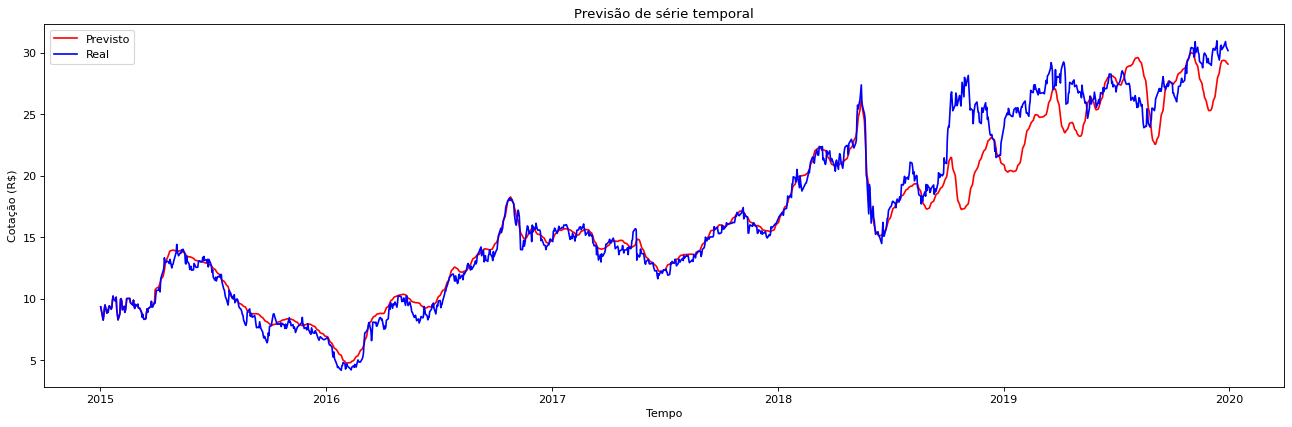

In [ ]:
allTargetData = np.vstack((dataset[:training_data_len, 0:1], dataset[training_data_len:, 0:1]))
training_predicted = regressor.predict(X_train)
volume = dataset[:len(X_train), 1:]
training_predicted = np.column_stack((training_predicted, volume))
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((dataset[0:window, 0:1], training_predicted[:,0:1], predicted[:,0:1]))
# date = df['DATA']
date = df.index

figure(figsize=(20, 6), dpi=80)
plt.plot(date, allForecastedData, color = 'red', label = 'Previsto')
plt.plot(date, allTargetData, color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1]))
print('RMSE: ', rmse)

RMSE:  3.089099752795109


In [ ]:
mse = mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1])
print('MSE: ',mse)

MSE:  9.542537282718802


In [ ]:
mape = np.mean(np.abs((dataset[training_data_len:, 0:1]-predicted[:,0:1]) /dataset[training_data_len:, 0:1])) * 100
print('MAPE: ',mape, '%')

MAPE:  8.73685764980834 %


In [ ]:
print('R2: ', r2_score(predicted[:,0:1], dataset[training_data_len:, 0:1]))

R2:  0.3748597646487616
